In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [92]:
df = pd.read_csv(r'/Users/joaopinto/projects/Capstone-LDSA/data/two-years-recid.csv')
df.head()

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_charge_degree,c_charge_desc,juv_fel_count,juv_misd_count,juv_other_count,priors_count,compas_screening_date,type_of_assessment,decile_score,score_text,v_type_of_assessment,v_decile_score,v_score_text,is_recid,r_case_number,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,NaN,F,False Imprisonment,0,0,0,0,2013-01-05,Risk of Recidivism,1,Low,Risk of Violence,1,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,NaN,M,Battery,0,0,0,1,2013-04-03,Risk of Recidivism,3,Low,Risk of Violence,3,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,NaN,M,DUI Level 0.15 Or Minor In Veh,0,0,0,8,2014-10-31,Risk of Recidivism,4,Low,Risk of Violence,2,Low,1,15043364TC20A,2015-07-23,(M2),Driving License Suspended,0,NaN,NaN,NaN,NaN,1
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaN,2014-01-23,F,arrest case no charge,0,1,0,1,2014-01-23,Risk of Recidivism,10,High,Risk of Violence,10,High,1,16000241MM20A,2016-01-04,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaN,NaN,NaN,1
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,NaN,M,Battery,0,0,0,0,2013-12-09,Risk of Recidivism,1,Low,Risk of Violence,1,Low,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [81]:
df['v_type_of_assessment'].value_counts().head(10)

Risk of Violence    6114
Name: v_type_of_assessment, dtype: int64

In [38]:
df.isna().sum()

id                          0
name                        0
sex                         0
dob                         0
age                         0
race                        0
c_jail_in                 260
c_jail_out                260
c_case_number              18
c_offense_date            959
c_arrest_date            5173
c_charge_degree             0
c_charge_desc              24
juv_fel_count               0
juv_misd_count              0
juv_other_count             0
priors_count                0
compas_screening_date       0
type_of_assessment          0
decile_score                0
score_text                  0
v_type_of_assessment        0
v_decile_score              0
v_score_text                0
is_recid                    0
r_case_number            3183
r_offense_date           3183
r_charge_degree          3183
r_charge_desc            3232
is_violent_recid            0
vr_case_number           5420
vr_offense_date          5420
vr_charge_degree         5420
vr_charge_

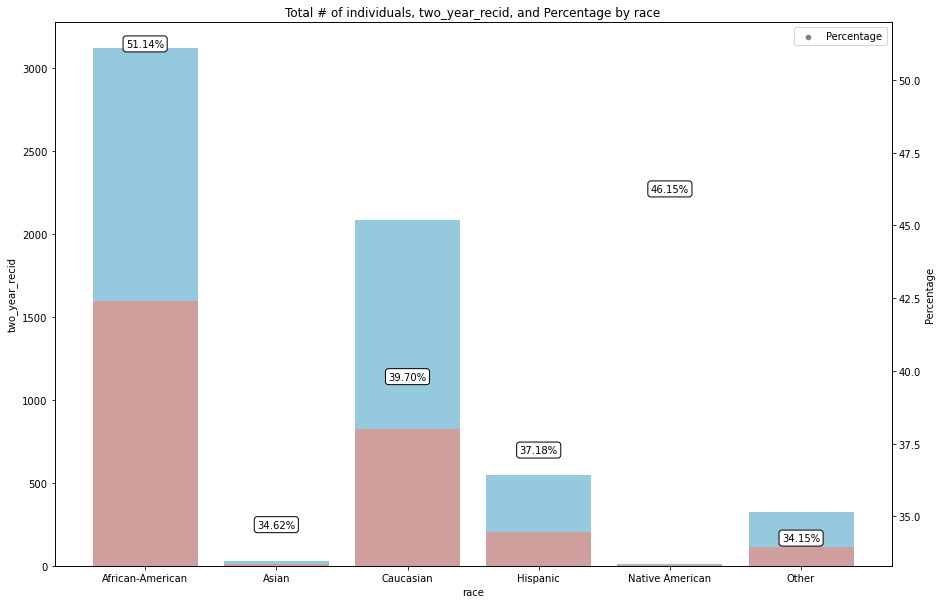

In [76]:
grouped = df.groupby('race').agg({'id':'count','two_year_recid':'sum'})

grouped['percentage'] = (grouped['two_year_recid'] / grouped['id']) * 100

# Plotting with Seaborn
plt.figure(figsize=(15, 10))
sns.barplot(data=grouped, x=grouped.index, y='id', color='skyblue', label='Total Individuals')
sns.barplot(data=grouped, x=grouped.index, y='two_year_recid', color='salmon', label='Two-Year Recidivism', alpha=0.7)

# Calculate and plot percentages
ax2 = plt.twinx()
sns.scatterplot(data=grouped, x=grouped.index, y='percentage', color='gray', ax=ax2, label='Percentage')

for index, row in grouped.iterrows():
    ax2.text(index, row['percentage'], f"{row['percentage']:.2f}%", color='black', ha="center", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Set labels and titles
plt.title('Total # of individuals, two_year_recid, and Percentage by race')
plt.ylabel('Count')
ax2.set_ylabel('Percentage')
plt.legend(loc='upper right')
plt.show()


In [77]:
df.describe().round(2)

,id,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,v_decile_score,is_recid,is_violent_recid,two_year_recid
count,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00,6114.00
mean,3057.50,34.76,0.06,0.09,0.10,3.44,4.49,3.69,0.48,0.11,0.45
std,1765.10,11.80,0.40,0.49,0.45,4.86,2.85,2.50,0.50,0.32,0.50
min,1.00,18.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,1529.25,25.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00
50%,3057.50,31.00,0.00,0.00,0.00,2.00,4.00,3.00,0.00,0.00,0.00
75%,4585.75,42.00,0.00,0.00,0.00,5.00,7.00,5.00,1.00,0.00,1.00
max,6114.00,96.00,10.00,13.00,9.00,38.00,10.00,10.00,1.00,1.00,1.00


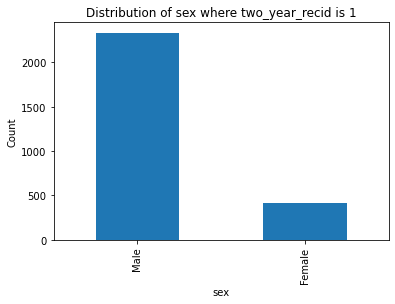

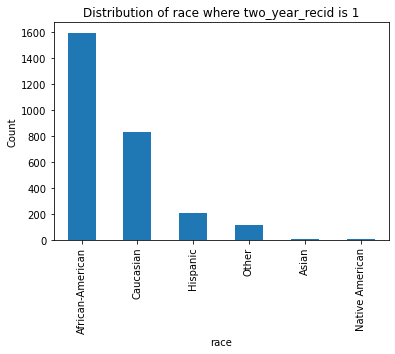

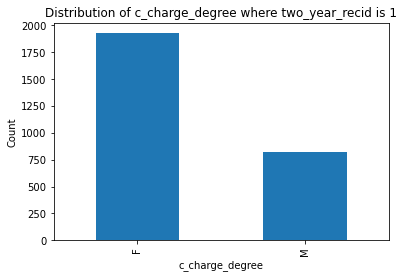

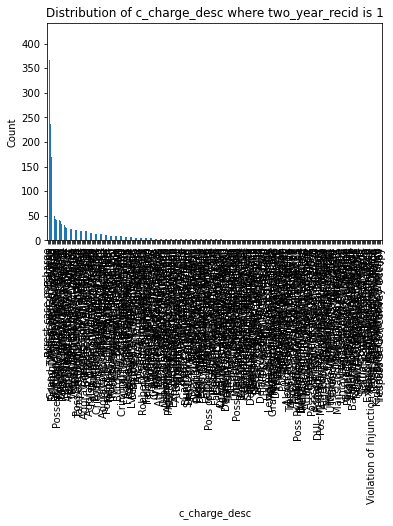

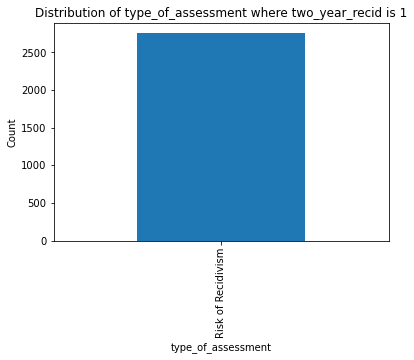

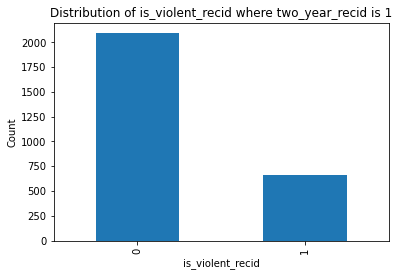

In [73]:
trues = df.loc[df['two_year_recid'] == 1]

categoricals = ['sex','race','c_charge_degree','c_charge_desc','type_of_assessment','is_violent_recid']

for col in categoricals:
    trues[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col} where two_year_recid is 1")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [91]:
charge_by_race = df.groupby(['race','r_charge_desc']).count()['two_year_recid'].reset_index().sort_values(by='two_year_recid',ascending=False)
charge_by_race.head(10)

,race,r_charge_desc,two_year_recid
136,African-American,Possess Cannabis/20 Grams Or Less,146
57,African-American,Driving License Suspended,139
163,African-American,Resist/Obstruct W/O Violence,110
115,African-American,Operating W/O Valid License,98
17,African-American,Battery,74
118,African-American,Petit Theft,74
250,Caucasian,Battery,68
187,African-American,Susp Drivers Lic 1st Offense,65
95,African-American,Grand Theft in the 3rd Degree,64
148,African-American,Possession of Cocaine,62
